In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
#df.isnull().sum()
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [14]:
df.shape

(19158, 13)

In [8]:
## what if our dataset has 100 columns then we can't serially read and find out which column has less than 5% missing 
#data

In [9]:
#We Use this 
list = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0 ]
list

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df[list].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [16]:
#check the percent of the data we just removes
(len(df[list].dropna())/len(df[list]))*100

89.68577095730244

In [17]:
new_df = df[list].dropna()

In [19]:
new_df.shape,df[list].shape

((17182, 5), (19158, 5))

In [20]:
#let's check the distribution of the data

<AxesSubplot: >

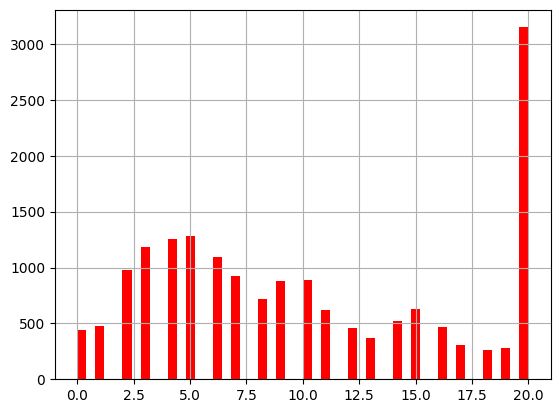

In [25]:
new_df['experience'].hist(bins=50,color='red')

<AxesSubplot: >

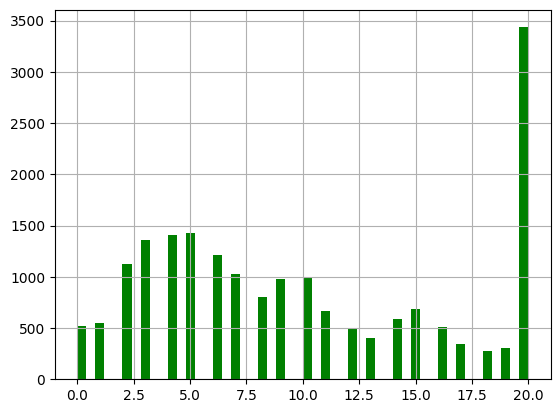

In [26]:
df['experience'].hist(bins=50,color='green')

## Our CCA Complete case Analysis was good since there is no change in data

<AxesSubplot: xlabel='training_hours', ylabel='Density'>

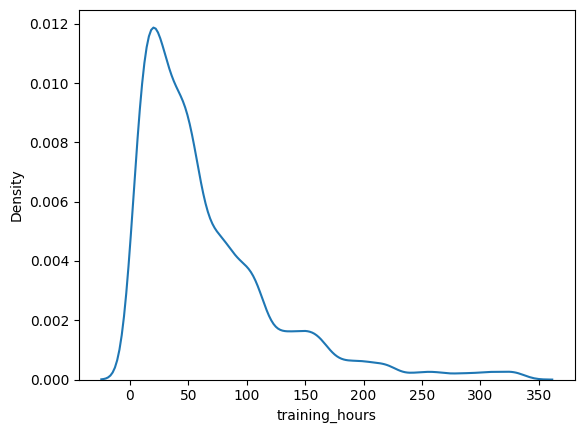

In [31]:
sns.kdeplot(new_df['training_hours'])

<AxesSubplot: xlabel='training_hours', ylabel='Density'>

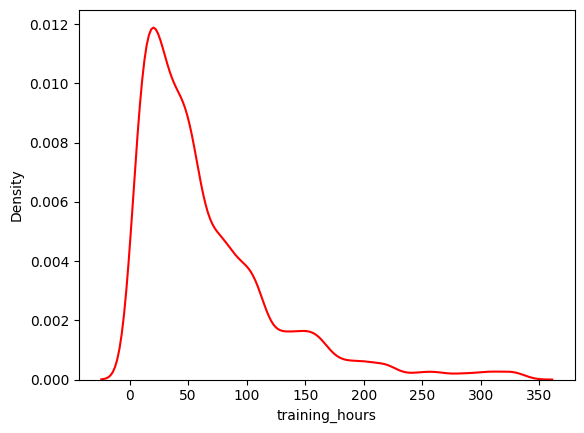

In [33]:
sns.kdeplot(df['training_hours'],color='red')

# For categorical CCA

In [35]:
df[list]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [36]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

0.8968577095730244